In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, BayesianRidge
from sklearn.linear_model import ElasticNet, Lars, LassoLars, Ridge, SGDRegressor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


import time

import warnings
warnings.filterwarnings("ignore")

In [3]:
Data = pd.read_csv('datacountstudents.csv')
Data = Data.drop('id', axis = 1)
Data

,yC,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,1,49.856000,118.8,1,0,0,0,0,16.32096,0,...,0.9709,0.0003,6,6,24.7138,0,0,7,0.056546,0.112860
1,0,71.836000,34.8,0,0,0,0,1,15.00535,44,...,0.4200,0.0000,8,4,38.0658,0,0,7,0.655260,0.886908
2,0,66.725000,41.8,0,1,0,0,0,17.07023,27,...,0.9650,0.0000,6,6,48.3807,0,1,4,0.067855,0.133944
3,0,41.696000,132.0,0,0,1,0,0,16.31460,0,...,0.0091,0.0001,6,4,59.8410,0,0,7,0.133230,0.260102
4,2,71.351000,24.2,1,0,0,0,0,11.10790,31,...,0.0051,0.0000,5,7,175.9250,0,0,3,0.318584,0.627729
5,3,71.565000,25.4,0,0,0,1,0,17.30379,38,...,0.0000,0.0000,5,7,14.9909,1,0,1,0.173189,0.330825
6,1,67.879000,42.3,0,0,0,0,1,15.07912,31,...,0.0022,0.0001,7,3,81.3357,0,0,5,0.219665,0.436101
7,1,76.994634,7.6,1,0,0,0,0,16.65255,45,...,0.0094,0.0082,6,6,31.9150,1,0,1,0.297416,0.558743
8,0,75.568293,8.0,0,0,0,0,0,15.85385,45,...,0.0204,0.0000,8,4,73.9691,1,0,1,0.285290,0.539237
9,0,64.827000,75.9,0,0,0,0,0,15.78388,31,...,0.9000,0.0000,7,3,83.0969,0,0,5,0.185113,0.342531


In [4]:
desc = Data.describe().transpose()
desc['type'] = Data.dtypes
desc

,count,mean,std,min,25%,50%,75%,max,type
yC,150.0,1.306667,1.335859,0.000000,0.000000,1.000000,2.000000,7.000000,int64
x1,150.0,64.315059,10.050340,34.217000,56.866750,67.754500,71.519725,78.836829,float64
x2,150.0,50.366667,41.298169,4.600000,14.725000,40.000000,81.400000,173.700000,float64
x3,150.0,0.300000,0.459793,0.000000,0.000000,0.000000,1.000000,1.000000,int64
x4,150.0,0.146667,0.354958,0.000000,0.000000,0.000000,0.000000,1.000000,int64
x5,150.0,0.040000,0.196616,0.000000,0.000000,0.000000,0.000000,1.000000,int64
x6,150.0,0.120000,0.326050,0.000000,0.000000,0.000000,0.000000,1.000000,int64
x7,150.0,0.100000,0.301005,0.000000,0.000000,0.000000,0.000000,1.000000,int64
x8,150.0,15.403789,1.929863,10.617270,14.507013,15.463720,16.586320,20.850060,float64
x9,150.0,27.593333,15.434684,0.000000,25.500000,31.000000,39.750000,45.000000,int64


In [5]:
Y = Data['yC']
X = Data.drop('yC', axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

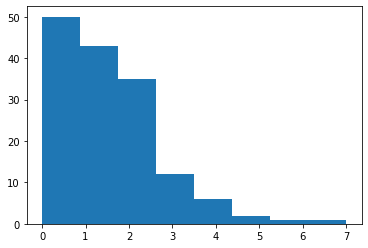

In [7]:
plt.hist(Y, bins = 8)
plt.show()

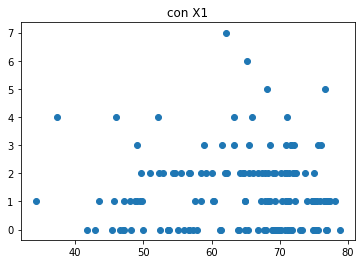

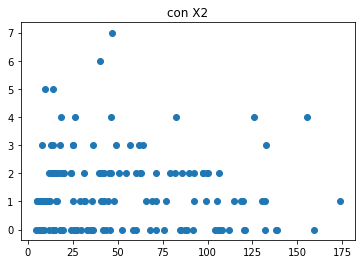

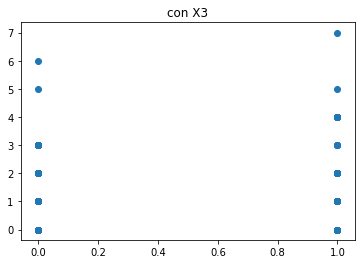

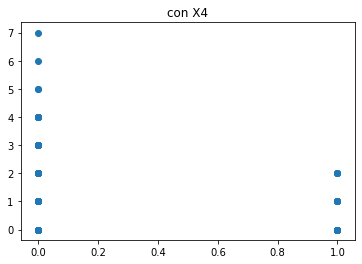

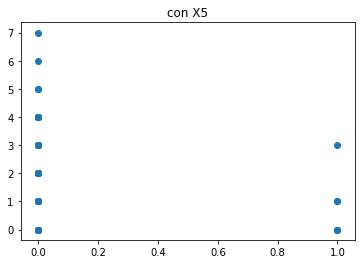

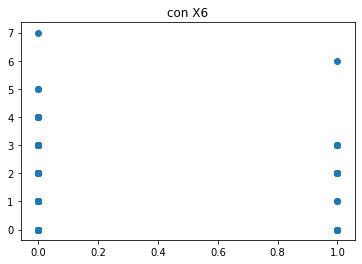

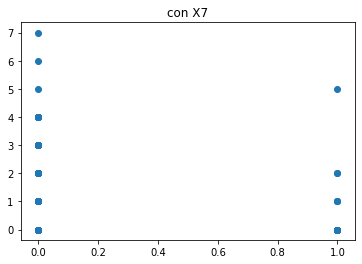

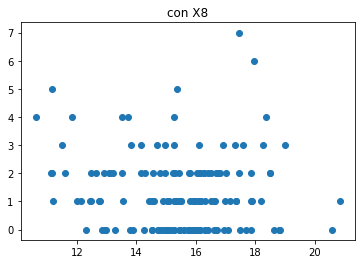

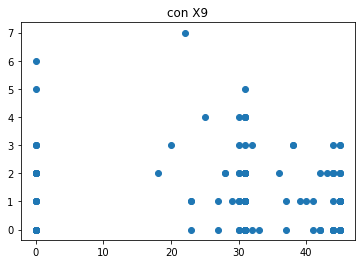

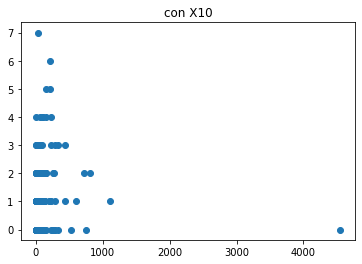

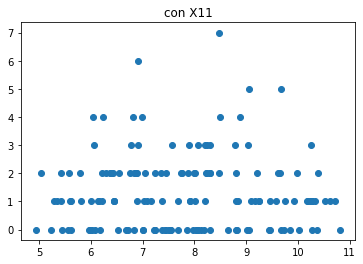

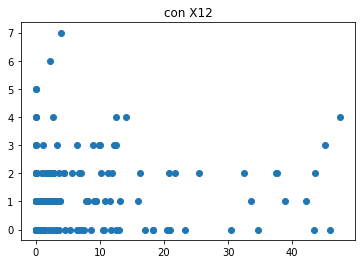

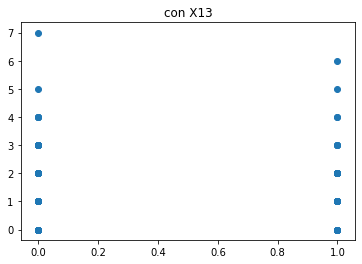

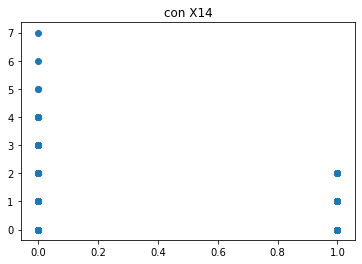

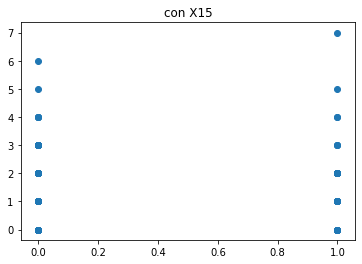

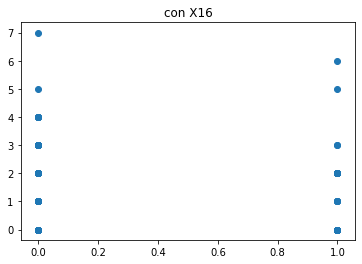

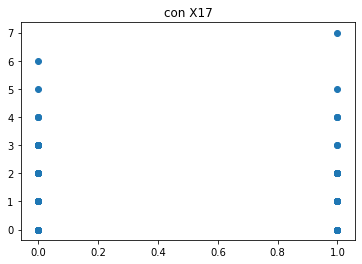

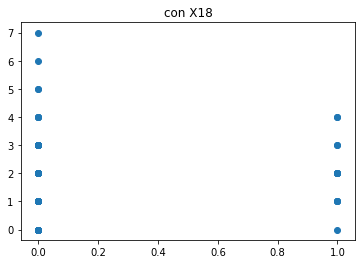

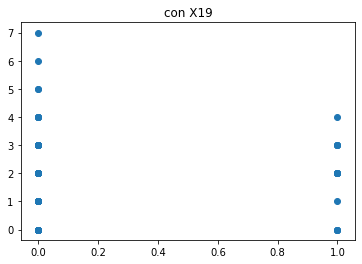

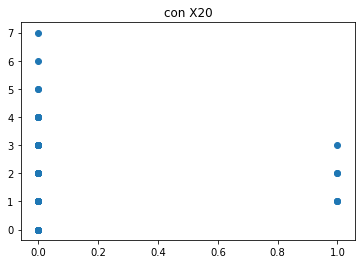

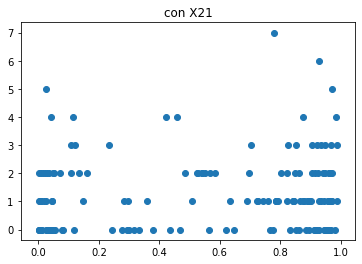

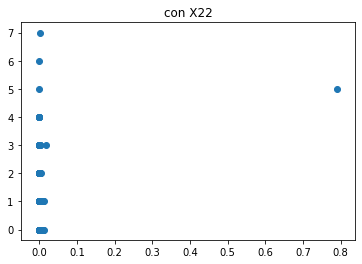

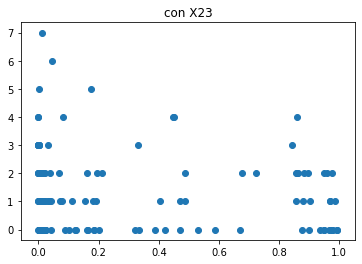

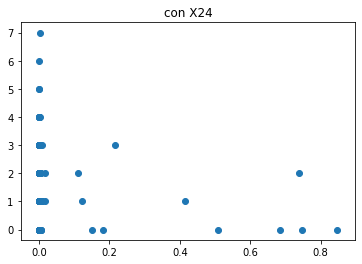

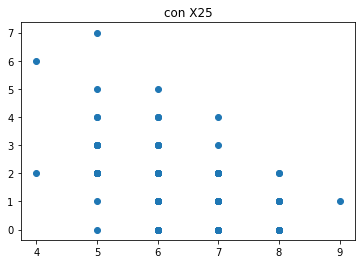

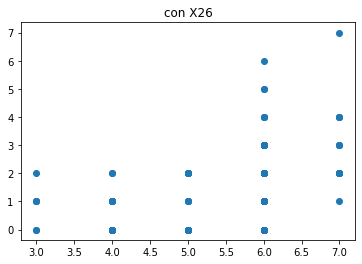

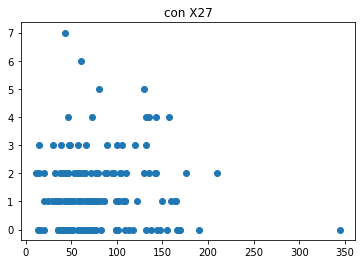

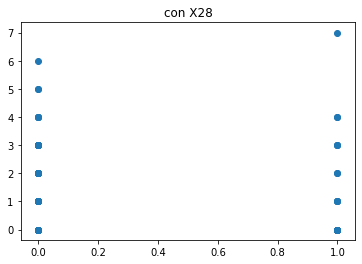

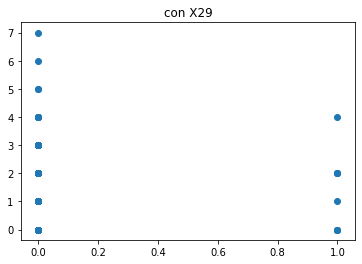

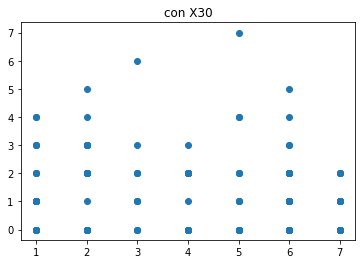

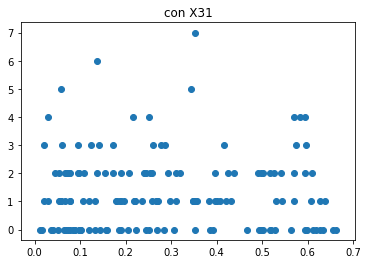

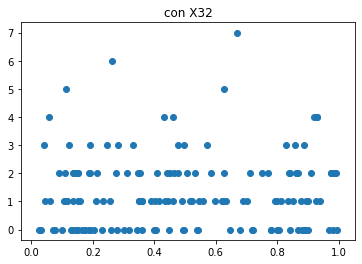

In [8]:
for i in range(X.shape[1]):
    plt.figure()
    plt.scatter(X.iloc[:,i], Y)
    plt.title('con X' + str(i+1))
    plt.show()

### Correlaciones

#### Pearson

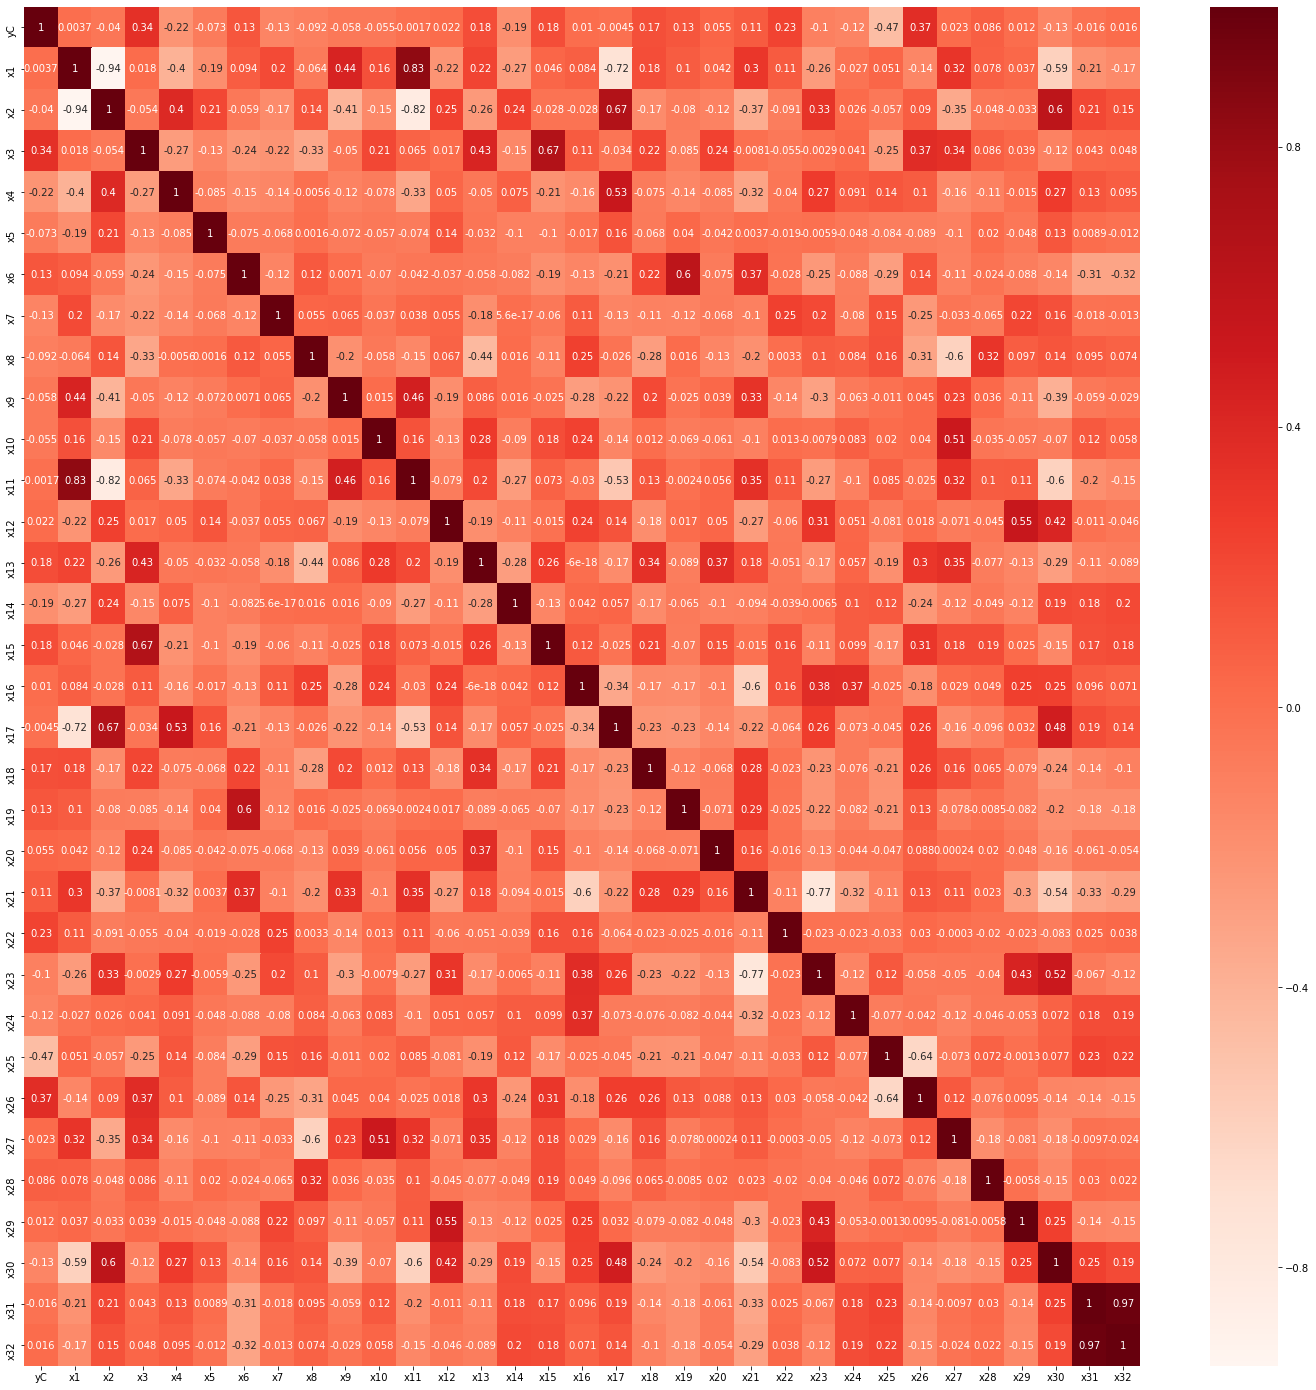

In [9]:
plt.figure(figsize=(25,25))
pcor = Data.corr()
sns.heatmap(pcor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Correlation with output variable
pcor_target = abs(pcor["yC"])
#Selecting highly correlated features
prelevant_features = pcor_target[pcor_target>0.5]
prelevant_features

yC    1.0
Name: yC, dtype: float64

#### Spearman

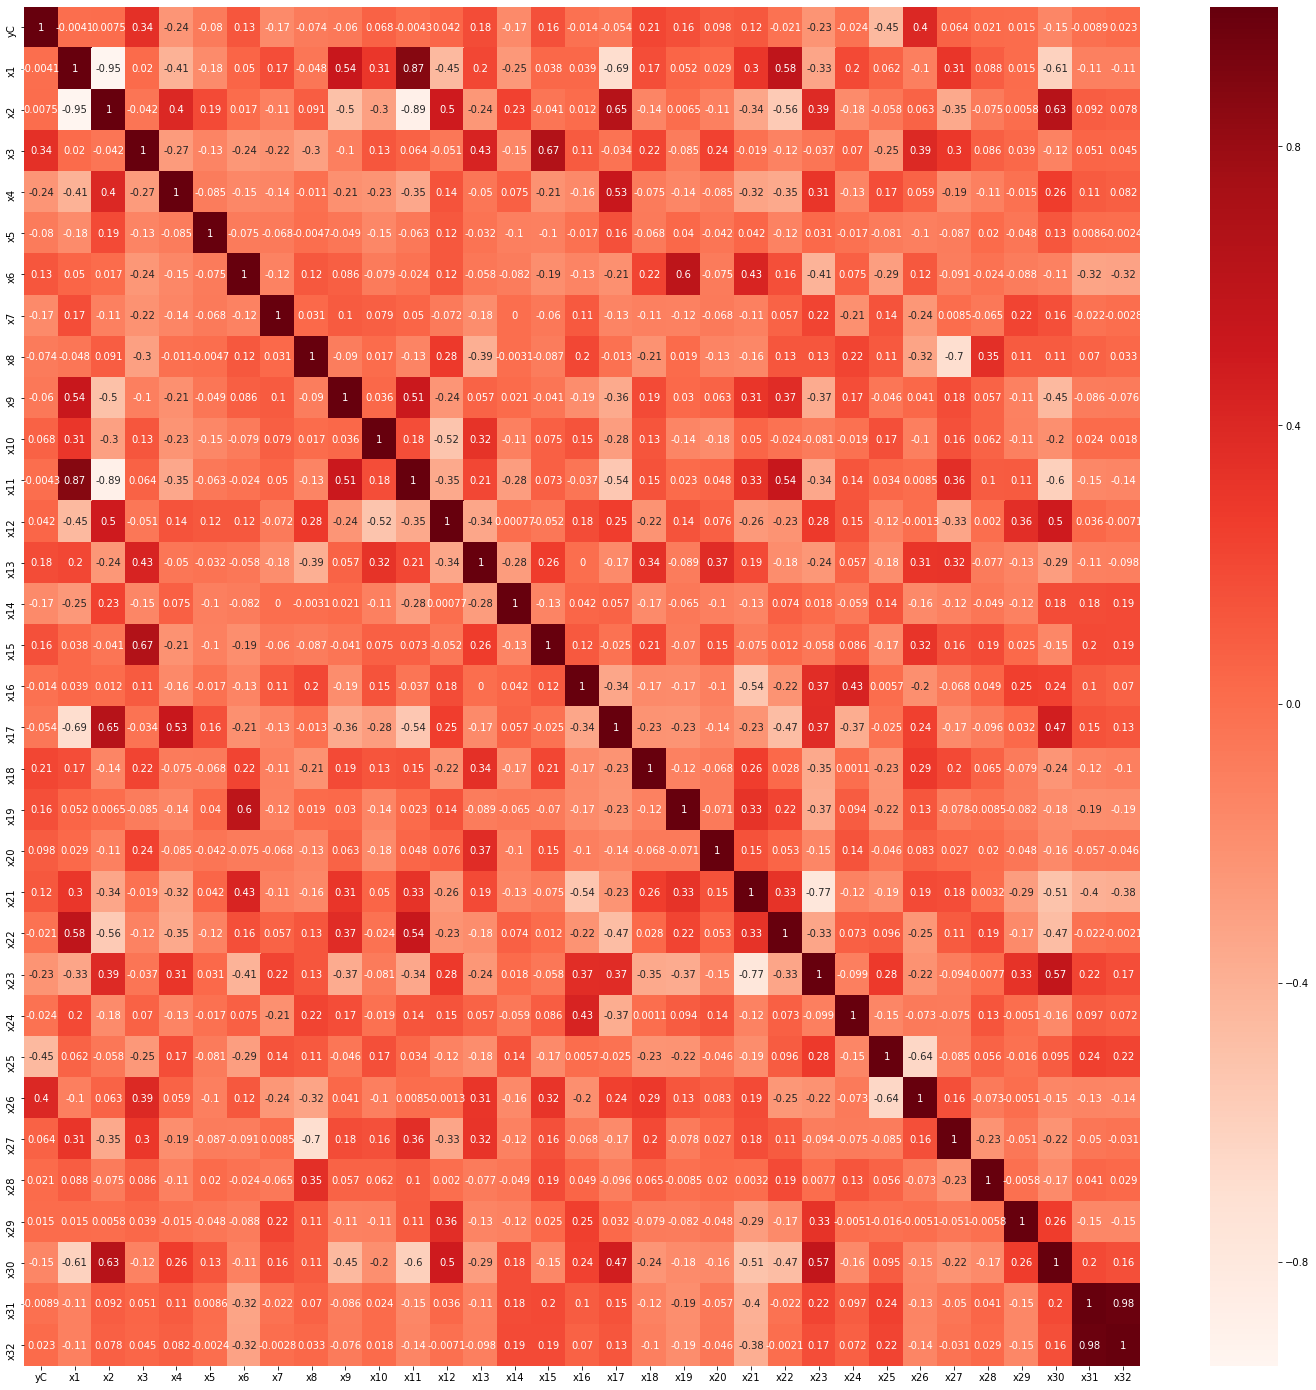

In [11]:
plt.figure(figsize=(25,25))
scor = Data.corr(method='spearman')
sns.heatmap(scor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#Correlation with output variable
scor_target = abs(scor["yC"])
#Selecting highly correlated features
srelevant_features = scor_target[scor_target>0.5]
srelevant_features

yC    1.0
Name: yC, dtype: float64

#### Kendal

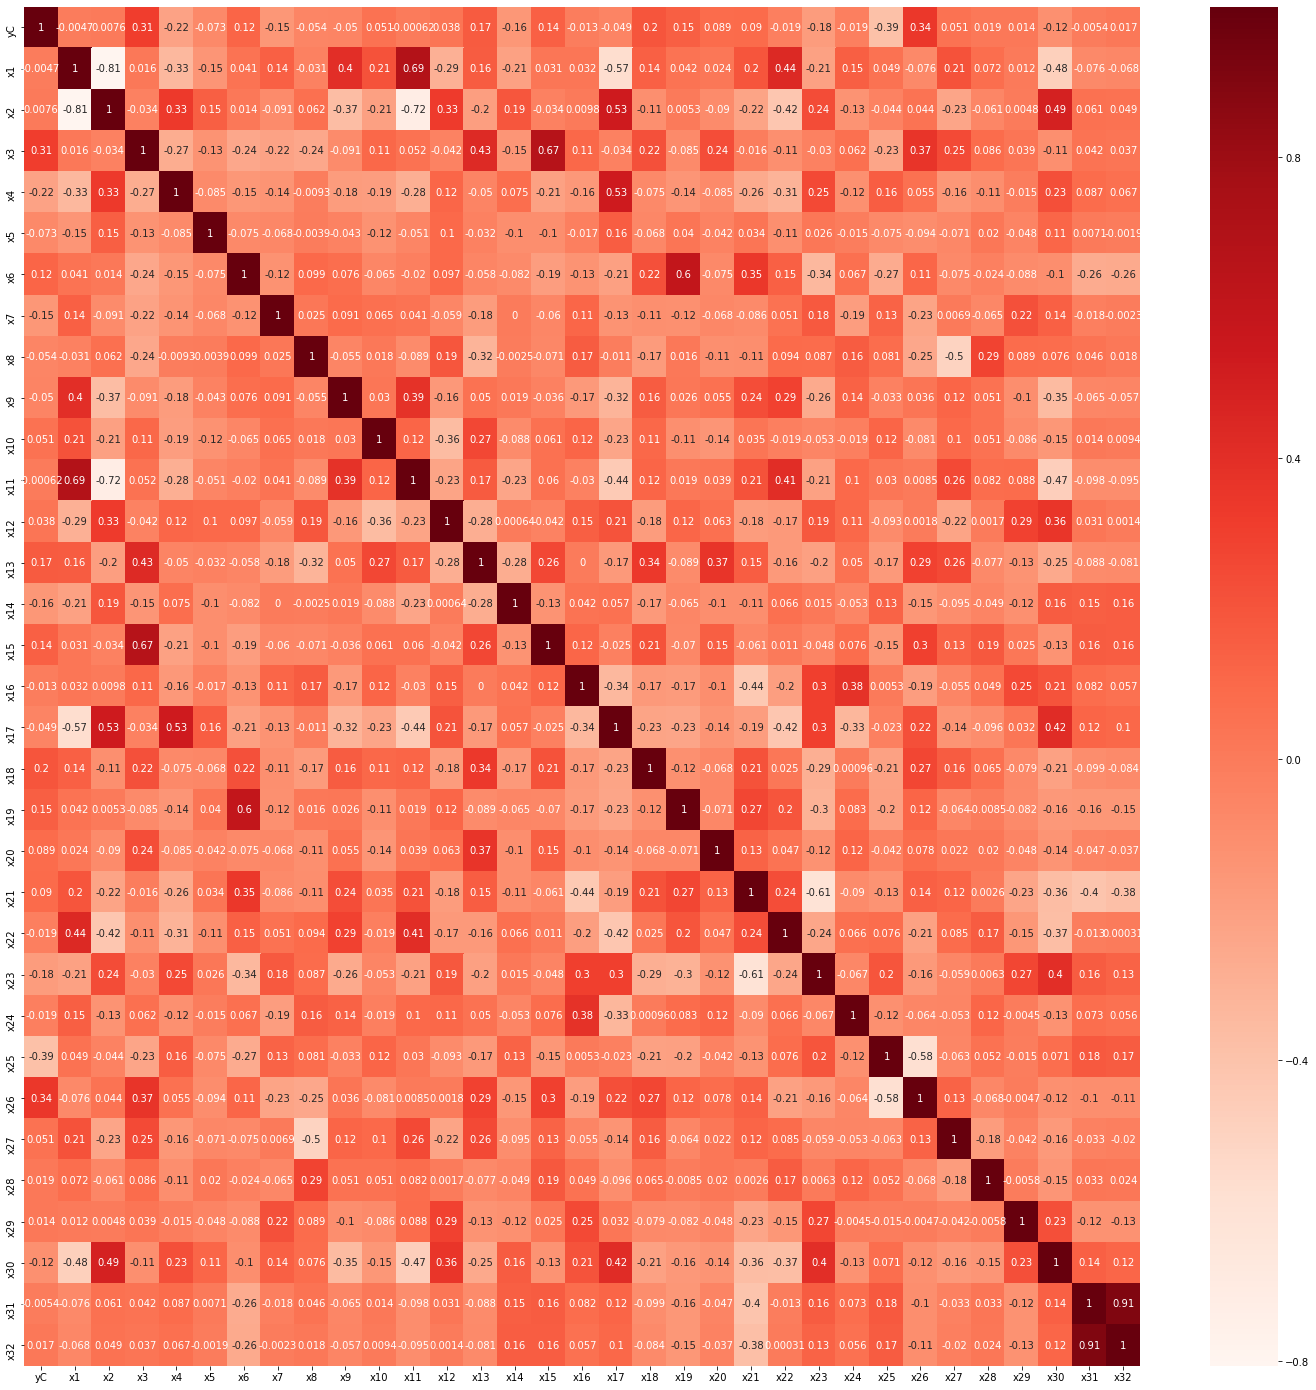

In [13]:
plt.figure(figsize=(25,25))
kcor = Data.corr(method='kendall')
sns.heatmap(kcor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
kcor_target = abs(kcor["yC"])
#Selecting highly correlated features
krelevant_features = kcor_target[kcor_target>0.5]
krelevant_features

yC    1.0
Name: yC, dtype: float64

## Select from Model

In [ ]:
print(X_train.shape)
X_train.head()

In [ ]:
lcv = LassoCV()
lcv.fit(X_train, y_train)
model = SelectFromModel(lcv, prefit=True)
X_new = model.transform(X)

In [ ]:
embeded_lr_selector = SelectFromModel(Lasso())
embeded_lr_selector.fit(X, Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

In [ ]:
embeded_lr_selector = SelectFromModel(())
embeded_lr_selector.fit(X, Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)